### Visualizing Feature Maps in Keras <br>
Feature maps are the outputs generated by applying filters on the input image or input feature map. For example when we apply 3 convolution filters of size 3 x 3 on an image, we get 3 feature maps. This example is depicted in the figure below: <br>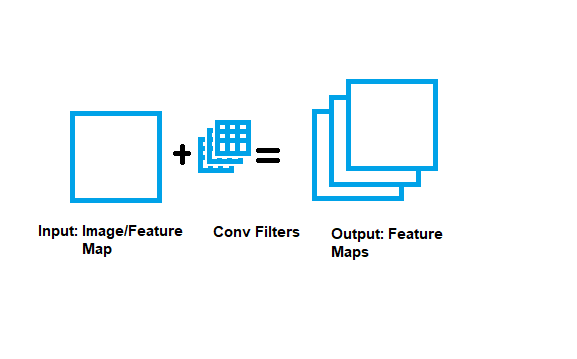



So, in this tutorial, we will learn how to visualize the feature maps in keras.

We will use the VGG-16 model from keras built in models with pretrained weights on imagenet and use it to see how the feature maps look like. <br>
We will use an image as input and pass it through our model.<br>

**Keep the following points in mind for visualizing feature maps:** <br>
* We need to access the output of intermediate layers of the CNN.
* We need the layer index number so that we can retrieve the appropriate layer output.
* These intermediate outputs are not the real outputs but they tell us the functions which will be generating the outputs.
* We need to create a visualization model that will have the same input layer as the original model but the output will be the output of the given layer.
* We will generate feature maps of only convolutional layers.

In [ ]:
cd drive/MyDrive/Computer\ Vision\ CS-867\ TAship/notebooks

In [24]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
from keras.models import Model

In [25]:
model = VGG16()

The following code block will show the feature maps size for each convolutional layer and the layer index in the model.

In [4]:
for i in range(len(model.layers)):
  layer = model.layers[i]
  if 'conv' not in layer.name:
    continue
  print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


The output printed above shows layer index on the leftmost, then the layer name and the shape of the feature map at the end.

Below, we will define the model which will have same input shape as the original model, but the output is the output feature maps of the specified layer.

In [7]:
# outputs the feature maps of layer index 1
feature_map_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [8]:
feature_map_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


Let's give an input image to our `feature_map_model`. Load the image `elephant.png` and preprocess it to feed to our model.

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

In [20]:
# load image with size 224 x 224
img = load_img('elephant.png', target_size=(224,224))

# convert img to array
img = img_to_array(img)

# expand dimensions to have shape (samples, height, width, channels)
img = expand_dims(img, axis=0)

In [21]:
img = preprocess_input(img)
feature_maps = feature_map_model.predict(img)

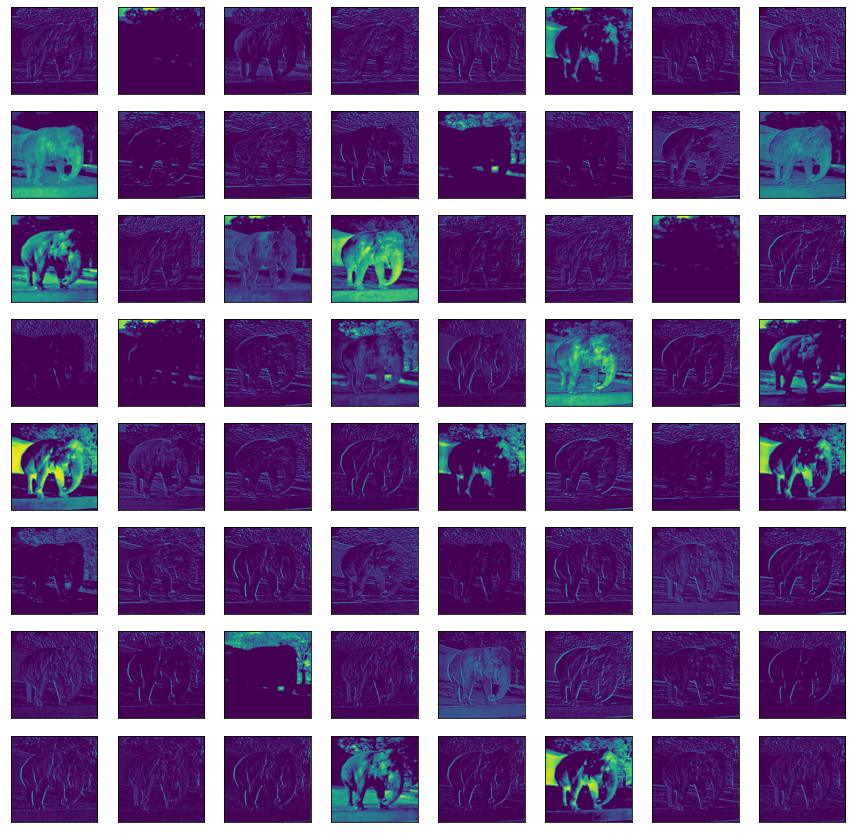

In [35]:
f = pyplot.figure()
f.set_size_inches(15,15)
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

This shows the feature maps at the first convolutional layers. Since we have used 64 Conv filters, so we get 64 feature maps, all of which are plotted. We can see that every feature map is learning different features; some are highlighting edges, some focus on background and some focus other parts of the image. <br>
So, in the similar way you can visualize the output feature maps of other layers as well.

Here is the original image: <br>

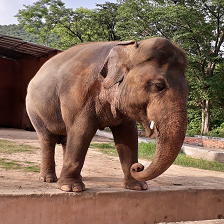